# TP3

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import sobel

### Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

In [47]:
image_template = cv2.imread('TP3/template/pattern_2.png', cv2.IMREAD_GRAYSCALE)
# w, h = image_template.shape[::-1]

image_1 =  cv2.imread('TP3/images/COCA-COLA-LOGO.jpg', cv2.IMREAD_GRAYSCALE)
print(image_1.shape)
image_2 =  cv2.imread('TP3/images/coca_logo_1.png', cv2.IMREAD_GRAYSCALE)
print(image_2.shape)
image_3 =  cv2.imread('TP3/images/coca_logo_2.png', cv2.IMREAD_GRAYSCALE)
print(image_3.shape)
image_4 =  cv2.imread('TP3/images/coca_multi.png', cv2.IMREAD_GRAYSCALE)
print(image_4.shape)
image_5 =  cv2.imread('TP3/images/coca_retro_1.png', cv2.IMREAD_GRAYSCALE)
print(image_5.shape)
image_6 =  cv2.imread('TP3/images/coca_retro_2.png', cv2.IMREAD_GRAYSCALE)
print(image_6.shape)
image_7 =  cv2.imread('TP3/images/logo_1.png', cv2.IMREAD_GRAYSCALE)
print(image_7.shape)


(1389, 1389)
(500, 207)
(363, 233)
(598, 799)
(493, 715)
(429, 715)
(450, 687)


In [48]:
def binarize_image(image):
    _, binary_image = cv2.threshold(image_template, 200, 255, cv2.THRESH_BINARY)
    return binary_image

In [565]:
class ImageTemplate:
    def __init__(self, template_path):
        self._template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
        self._height, self._width = self._template.shape
        
    @property
    def height(self):
        return self._height
    
    @property
    def width(self):
        return self._width
    
    @property
    def image(self):
        return self._template
    
    def preprocess(self, x_scale, y_scale):
        if x_scale < 0.7 or y_scale < 0.7:
            x_scale, y_scale = 0.3, 0.3
        # resize template
        result = cv2.resize(self._template, None, fx=x_scale, fy=y_scale, interpolation=cv2.INTER_CUBIC)
        # Apply canny and return
        result = cv2.GaussianBlur(result, (3, 3), 0)
        result = cv2.Canny(result, 25, 50, )
        
        # result = cv2.GaussianBlur(result, (5, 5), 0)
        kernel = np.ones((3, 3), np.uint8)
        result = cv2.dilate(result, kernel, iterations=1)
        return result
        # Detectar contornos
        # contours, _ = cv2.findContours(result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Crear una imagen vacía para rellenar los contornos
        # filled_image = np.zeros_like(result)

        # Rellenar los contornos cerrados con color blanco
        # cv2.drawContours(filled_image, contours, -1, (255), thickness=cv2.FILLED)
        # return filled_image

        

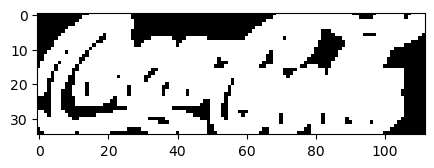

In [566]:
template_path = 'TP3/template/pattern_2.png'
template = ImageTemplate(template_path)
template_image = template.preprocess(0.1,0.1)
plt.figure(figsize=(5, 5))
# plt.imshow(template.preprocess(0.3,0.3), cmap='gray')
plt.imshow(template.preprocess(0.1,0.1), cmap='gray')
# np.max(template.preprocess(5,5))

In [606]:
def auto_canny(image, sigma=0.7):
    # Calcula la mediana de los píxeles de la imagen
    v = np.median(image)

    # Define los umbrales bajo y alto basados en la mediana
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))

    # Aplicar Canny con los umbrales calculados
    edges = cv2.Canny(image, lower, upper)
    return edges

def preprocess_image(image):
    result = image
    
    lower_percentile = np.percentile(image, 50)*2
    upper_percentile = np.percentile(image, 95)*2
    print(lower_percentile)
    print(upper_percentile)
    kernel_size = int(min(result.shape[0], result.shape[1]) / 100) | 1
    print(kernel_size)
    result = cv2.GaussianBlur(result, (kernel_size, kernel_size), 0)
    
    result = cv2.Canny(result,200,300)
    
    
    # kernel = np.ones((3, 3), np.uint8)
    # result = cv2.dilate(result, kernel, iterations=1)
    # result = cv2.GaussianBlur(image,(1,13),0)
    # result = auto_canny(result)
    
    return result    

282.0
510.0
3


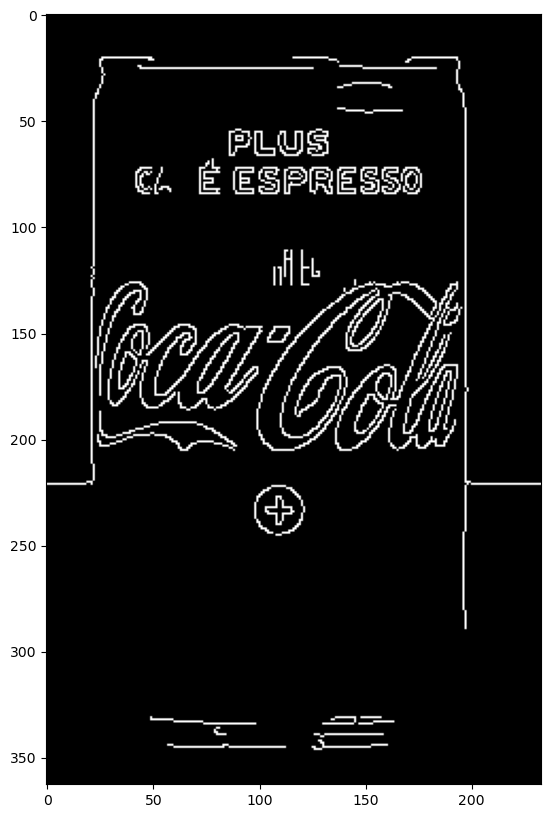

In [609]:
# Image preprocessing
image_1_binary = preprocess_image(image_3)
plt.figure(figsize=(10, 10))
plt.imshow(image_1_binary, cmap='gray')
# cv2.imshow("", image_1_binary)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [610]:
print(image_3.shape)
h, w = image_1_binary.shape
h_t, w_t = image_template.shape
image_surface = h*w
template_surface = h_t * w_t
proportion = 0.10
start_point = (image_surface*proportion)/template_surface
print(start_point)

(363, 233)
0.19328808446455503


0.057986425339366515
(35, 112)
-6.72792452860449e-08 0.42797720432281494 (55, 244) (94, 160)


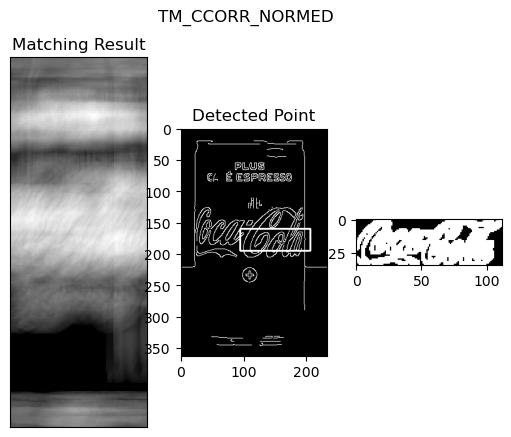

(35, 112)
-6.72792452860449e-08 0.42797720432281494 (55, 244) (94, 160)


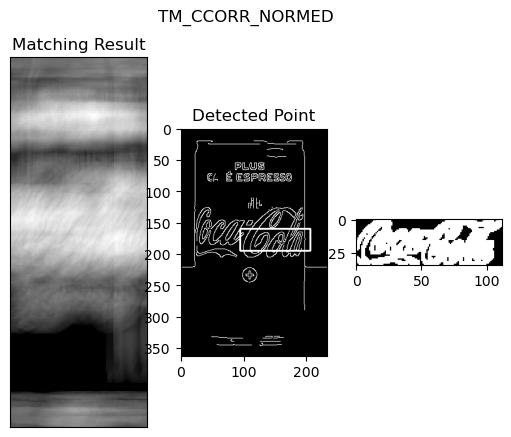

(35, 112)
-6.72792452860449e-08 0.42797720432281494 (55, 244) (94, 160)


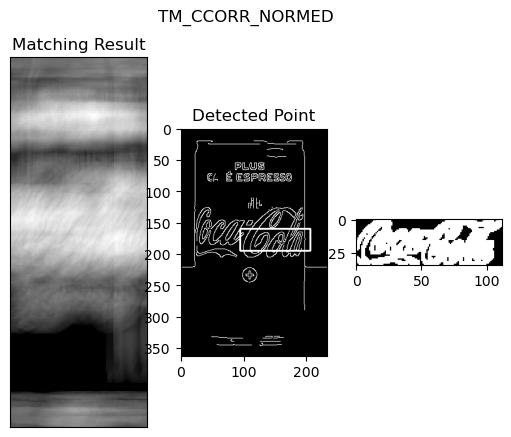

(35, 112)
-6.72792452860449e-08 0.42797720432281494 (55, 244) (94, 160)


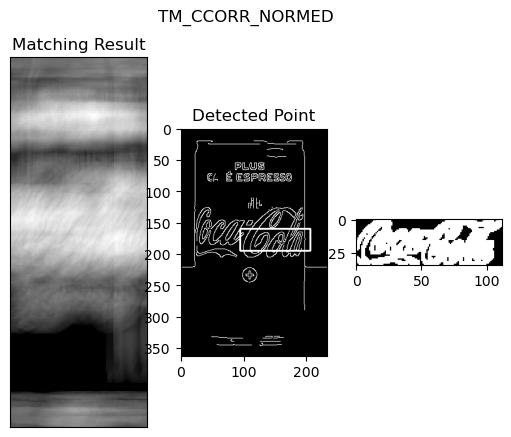

(35, 112)
-6.72792452860449e-08 0.42797720432281494 (55, 244) (94, 160)


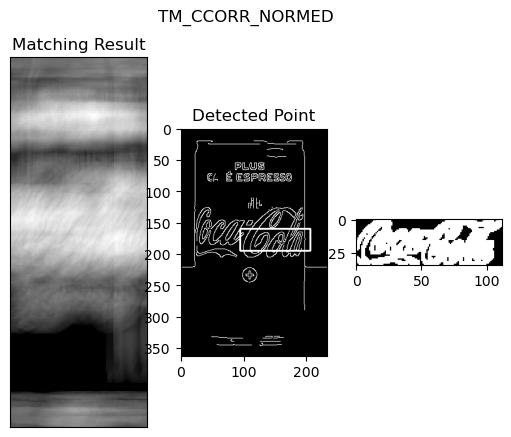

(35, 112)
-6.72792452860449e-08 0.42797720432281494 (55, 244) (94, 160)


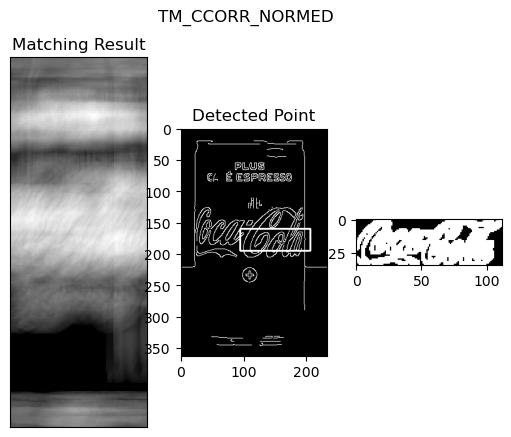

(35, 112)
-6.72792452860449e-08 0.42797720432281494 (55, 244) (94, 160)


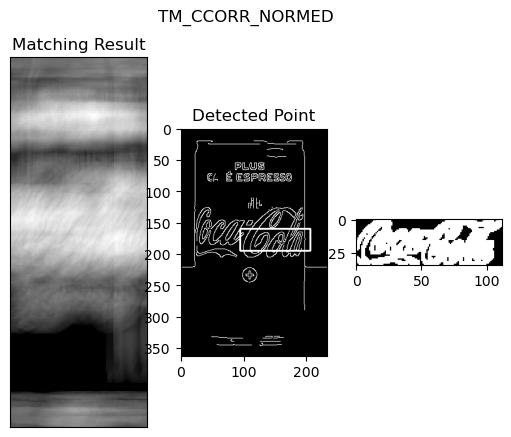

(89, 284)
Maximo valor 0.42797720432281494


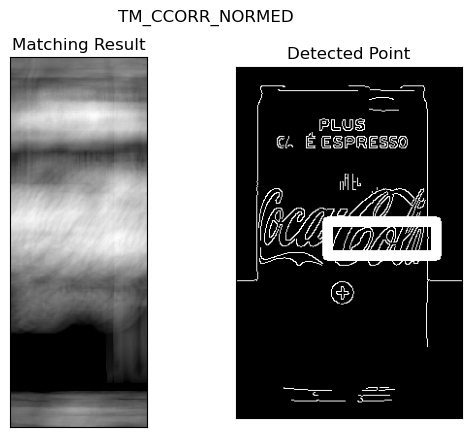

In [614]:
# All the 6 methods for comparison in a list
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
            'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']
 
# scales = np.linspace(1, 20, 10) # image_1
h, w = image_1_binary.shape
h_t, w_t = image_template.shape
image_surface = h*w
template_surface = h_t * w_t
proportion = 0.03
start_point = (image_surface*proportion)/template_surface
print(start_point)
scales = np.linspace(start_point
                     , 100, 1000) # image_3
max_value = 0
img_max = None
for scale in scales:
    image_template_binary_resize = template.preprocess(x_scale=scale, y_scale=scale) #y_scale=1)
    print(image_template_binary_resize.shape)
    
    img = image_1_binary.copy()
    # method = getattr(cv2, meth)
 
    # Apply template Matching
    try:
        res = cv2.matchTemplate(img,image_template_binary_resize, cv2.TM_CCORR_NORMED)
    except Exception as e:
        break
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(min_val, max_val, min_loc, max_loc)
 
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    #     top_left = min_loc
    # else:a

    top_left = max_loc
    w, h = image_template_binary_resize.shape[::-1]
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(131),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), 
    plt.suptitle('TM_CCORR_NORMED')
    plt.subplot(133),plt.imshow(image_template_binary_resize,cmap = 'gray')
    plt.show()
 
    if max_val < 1 and max_val > max_value:
        img_max = img.copy()
        top_left_max = max_loc
        w, h = image_template_binary_resize.shape[::-1]
        bottom_right_max = (top_left_max[0] + w, top_left_max[1] + h)
        max_value = max_val
 
print("Maximo valor {max_value}".format(max_value=max_value))
cv2.rectangle(img_max,top_left_max, bottom_right_max, 255, 10)
 
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_max,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle('TM_CCORR_NORMED')
plt.show()

Con descriptores. Me canse del matchtemplate

In [598]:
# Cargar imagen de referencia y la imagen donde buscar el logo
img_template = cv2.imread('TP3/template/pattern.png', 0)
img_template = cv2.Canny(img_template,80,150)
print("Tamaño del template ", img_template.shape)
# img_template = cv2.resize(img_template,None, fx=0.3, fy=0.8)
# img_scene = cv2.imread('TP3/images/logo_1.png', 0)
# img_scene = cv2.imread('TP3/images/coca_logo_1.png', 0)
# img_scene = cv2.imread('TP3/images/coca_logo_2.png', 0)
# img_scene = cv2.imread('TP3/images/logo_1.png', 0)
# img_scene = cv2.imread('TP3/images/coca_retro_2.png', 0)
# img_scene = cv2.imread('TP3/images/coca_retro_1.png', 0)
# img_scene = cv2.imread('TP3/images/coca_multi.png', 0)
img_scene = cv2.imread('TP3/images/COCA-COLA-LOGO.jpg', 0)


print("Tamaño de la imagen ", img_scene.shape)
kernel_size = int(min(img_scene.shape[0], img_scene.shape[1]) / 100) | 1
img_scene = cv2.GaussianBlur(img_scene, (kernel_size, kernel_size), 0)
img_scene = cv2.Canny(img_scene,200,300)
print(kernel_size)
# Crear el detector ORB (puedes usar SIFT o SURF si están disponibles)
# orb = cv2.ORB_create()
sift = cv2.SIFT_create()

# Detectar puntos clave y descriptores
kp_logo, des_logo = sift.detectAndCompute(img_template, None)
kp_scene, des_scene = sift.detectAndCompute(img_scene, None)

Tamaño del template  (175, 400)
Tamaño de la imagen  (1389, 1389)
13


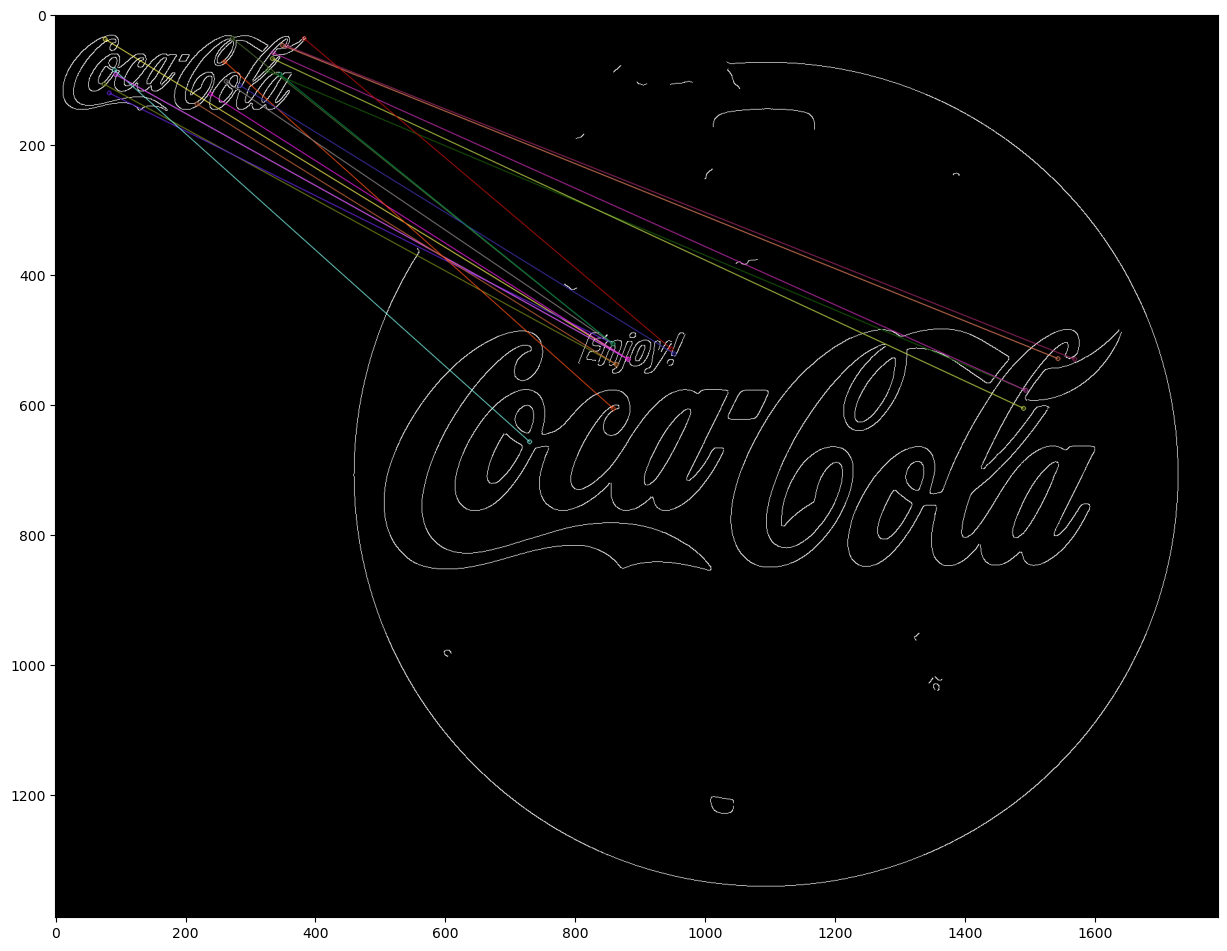

(<matplotlib.image.AxesImage at 0x7f3d7bb6da00>, None)

In [599]:
#create BFMatcher object
bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)
 
# Match descriptors.
matches = bf.knnMatch(des_logo,des_scene, k=2)
 
# Sort them in the order of their distance.
# matches = sorted(matches, key = lambda x:x.distance)
 
good = []
for m,n in matches:
    if m.distance < 0.85*n.distance:
        # print("-------------------------")
        # print("M.Distance ", str(m.distance))
        # print("N.Distance ", str(n.distance))
        good.append([m])
        

# x_pts = np.int32([ kp_scene[m[0].trainIdx].pt[0] for m in good ])
# y_pts = np.int32([ kp_scene[m[0].trainIdx].pt[1] for m in good ])
# print(np.median(x_pts))
# x_lower_bound = np.mean(x_pts) - 0.5 * np.std(x_pts)
# x_upper_bound = np.mean(x_pts) + 0.5 * np.std(x_pts)
# print(np.median(y_pts))
# print(np.percentile(x_pts, 90))
# print(np.percentile(y_pts, 90))
# y_lower_bound = np.mean(y_pts) - 0.5 * np.std(y_pts)
# y_upper_bound = np.mean(y_pts) + 0.5 * np.std(y_pts)
# x_pts = x_pts[(x_pts >= x_lower_bound ) & (x_pts <= x_upper_bound)]
# y_pts = y_pts[(y_pts >= y_lower_bound ) & (y_pts <= y_upper_bound)]


# cv2.rectangle(img_scene,(int(np.min(x_pts)*0.8), int(np.min(y_pts)*0.8)), (int(np.max(x_pts)*1.2), int(np.max(y_pts)*1.2)), 255, 10)
img3 = cv2.drawMatchesKnn(img_template,kp_logo,img_scene,kp_scene,good,None,flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# img3 = cv2.drawKeypoints(img_scene, kp_scene, img_scene)
plt.figure(figsize=(15,15))
plt.imshow(img3, cmap='gray'),plt.show()

In [451]:
print(np.max(dst_pts))

519.5413


In [430]:
# Crear el detector SIFT
sift = cv2.SIFT_create()

# Detectar puntos clave y calcular descriptores
kp_logo, des_logo = sift.detectAndCompute(img_template, None)
kp_scene, des_scene = sift.detectAndCompute(img_scene, None)

# Emparejar descriptores
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
# matches = bf.M(des_logo, des_scene)
matches = bf.knnMatch(des_logo,des_scene, k=2)

# Ordenar las coincidencias
# matches = sorted(matches, key=lambda x: x.distance)

good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        # print("-------------------------")
        # print("M.Distance ", str(m.distance))
        # print("N.Distance ", str(n.distance))
        good.append([m])

# Extraer los puntos clave coincidentes
src_pts = np.float32([kp_logo[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
dst_pts = np.float32([kp_scene[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

# Calcular la homografía
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)

# Obtener las dimensiones del logo
h, w = img_template.shape

# Definir los puntos de los bordes del logo
logo_corners = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)

# Transformar los puntos de los bordes usando la homografía
scene_corners = cv2.perspectiveTransform(logo_corners, M)

# Dibujar el recuadro en la imagen de la escena
img_scene_with_box = cv2.polylines(img_scene, [np.int32(scene_corners)], isClosed=True, color=(255, 255, 255), thickness=3)

# Mostrar la imagen con el recuadro
cv2.imshow('Detected Logo', img_scene_with_box)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.10.0) /home/conda/feedstock_root/build_artifacts/libopencv_1717728558155/work/modules/core/src/batch_distance.cpp:303: error: (-215:Assertion failed) K == 1 && update == 0 && mask.empty() in function 'batchDistance'
